# Auto Arima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [4]:
#!pip install pmdarima

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('SeriesTemporais/Download/Dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

<ipython-input-5-c5132b0cabf3>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [6]:
data.shape

(144, 1)

In [7]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


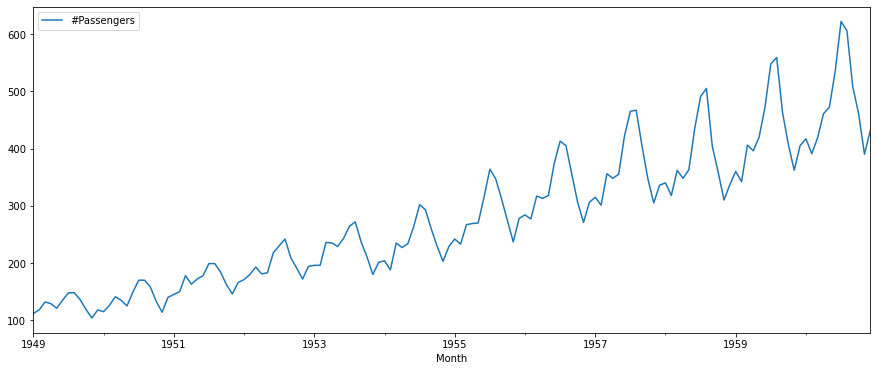

In [8]:
data.plot()

In [10]:
adf_test = ADFTest(alpha=0.05)

In [9]:
## pip install pmdarima
from pmdarima.arima import ADFTest

In [12]:
adf_test.should_diff(data)

(0.01, False)

In [10]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=2.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.86 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=5.97 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [11]:
print(stepwise_model.aic())

1019.1780567487583


In [12]:
train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [13]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [14]:
future_forecast = stepwise_model.predict(n_periods=12)

In [15]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

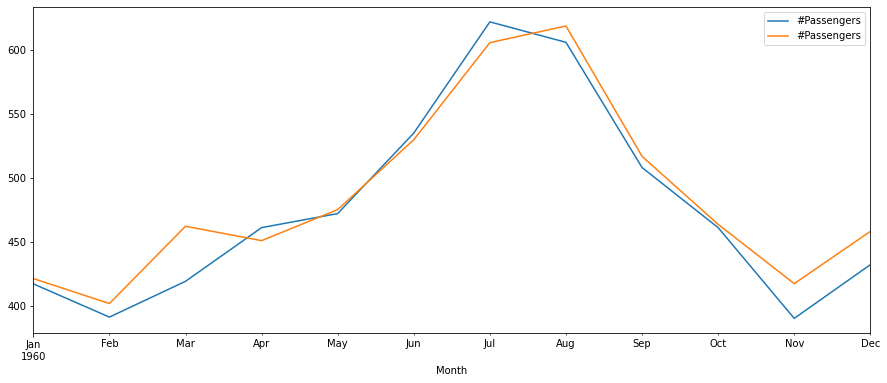

In [16]:
pd.concat([test,future_forecast],axis=1).plot()

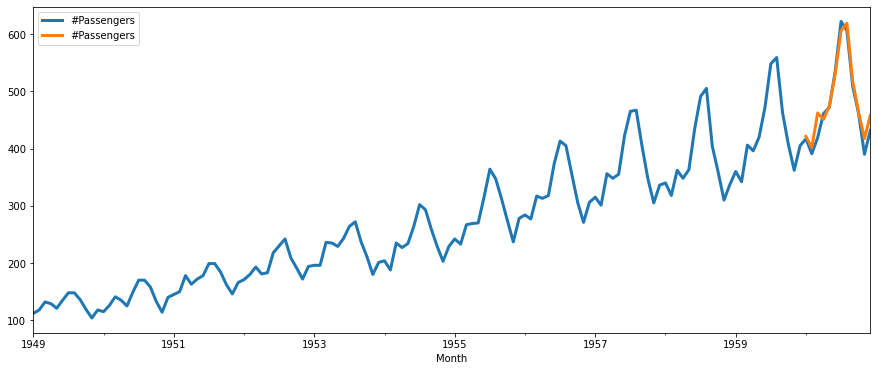

In [17]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)

In [18]:
pd.concat([test,future_forecast],axis=1)

,#Passengers,#Passengers
Month,,
1960-01-01,417,421.153373
1960-02-01,391,401.605753
1960-03-01,419,462.083577
1960-04-01,461,450.826711
1960-05-01,472,475.124360
1960-06-01,535,529.774276
1960-07-01,622,605.741141
1960-08-01,606,618.774117
1960-09-01,508,516.769043
